<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-PyTorch/blob/master/Chapter02/Building_a_neural_network_using_PyTorch_on_a_toy_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [2]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [4]:
import torch.nn as nn

In [5]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [ ]:
#alternative way (manual)
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Parameter(torch.rand(2,8))
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Parameter(torch.rand(8,1))
    def forward(self, x):
        x = x @ self.input_to_hidden_layer
        x = self.hidden_layer_activation(x)
        x = x @ self.hidden_to_output_layer
        return x

In [16]:
torch.manual_seed(0)
mynet = MyNeuralNet().to(device)

In [18]:
mynet.input_to_hidden_layer.weight


<generator object Module.parameters at 0x000001B44829C040>

In [23]:
mynet.parameters()

# NOTE - This line of code is not a part of model building,
# this is used only for illustration of how to
# obtain parameters of all layers in a model
# by looping through the generator object
for par in mynet.parameters():
    print(par)

Parameter containing:
tensor([[-0.0053,  0.3793],
        [-0.5820, -0.5204],
        [-0.2723,  0.1896],
        [-0.0140,  0.5607],
        [-0.0628,  0.1871],
        [-0.2137, -0.1390],
        [-0.6755, -0.4683],
        [-0.2915,  0.0262]], requires_grad=True)
Parameter containing:
tensor([ 0.2795,  0.4243, -0.4794, -0.3079,  0.2568,  0.5872, -0.1455,  0.5291],
       requires_grad=True)
Parameter containing:
tensor([[-0.0570,  0.0374,  0.3201, -0.3280, -0.2226, -0.0895, -0.1378,  0.3055]],
       requires_grad=True)
Parameter containing:
tensor([-0.2292], requires_grad=True)


In [7]:
loss_func = nn.MSELoss()

In [8]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(88.6566, grad_fn=<MseLossBackward0>)


In [24]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

In [ ]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

Text(0, 0.5, 'loss value')

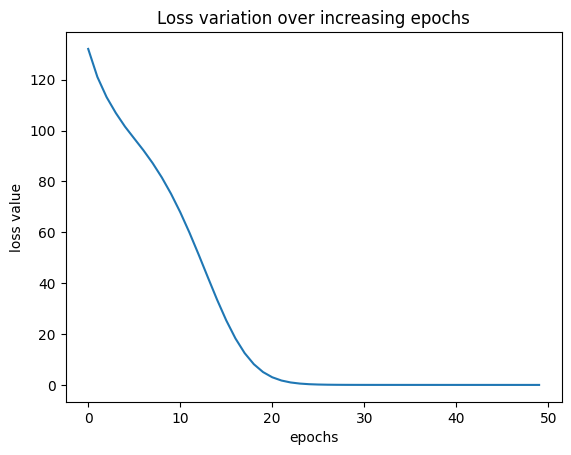

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')